In [1]:
from google.colab import drive
drive.mount('/content/gdrive' , force_remount=True)
import sys

Mounted at /content/gdrive


In [ ]:
import pandas as pd
tweet_en_filtered = pd.read_csv('/content/gdrive/MyDrive/gmf/solutions/tweets/filtered_tweet_en_with_sentiment.csv', engine = 'python')
tweet_en_filtered.head()

,date,username,tweet,sentiment
0,2020-03-02,_keremturk,prof.melihaaltunışık is giving her speech abou...,0.6597
1,2020-03-02,_keremturk,now prof. fuat keyman is giving his speech abo...,0.2500
2,2020-02-26,_keremturk,now @muverrihistoria is giving his speech at f...,0.3400
3,2020-02-19,_keremturk,"now @tobbetu_sui is hosting h.e. jonathan tow,...",0.5423
4,2020-01-15,_keremturk,now we are (@tobbetu_sui) hosting @mdekwaasten...,0.8402


In [ ]:
len(tweet_en_filtered[tweet_en_filtered['username']=='akinunver'])

2477

# English Filtreleme


In [45]:
import pandas as pd
import os
os.chdir('/content/gdrive/MyDrive/gmf/') 
os.getcwd()
#pd.set_option("display.max_rows", None, "display.max_columns", None)

'/content/gdrive/MyDrive/gmf'

In [ ]:
tweet_en = pd.read_csv('/content/gdrive/My Drive/gmf/tweet_en' , engine = 'python')#loading all the tweets,which are not filtred.

In [ ]:
len(tweet_en)

18955826

In [ ]:
tweet_en.head()

,date,username,tweet
0,2020-06-21,_keremturk,@iptidaisum I'm asking as a Shafi Why not? :)
1,2020-06-10,_keremturk,"WED, JUN 10, 2020 9:00 AM ONLINE EVENT with th..."
2,2020-04-23,_keremturk,@ForeignAffairs I think it will be a challenge...
3,2020-04-02,_keremturk,@AhmadRShamsi It will definitely be very good....
4,2020-04-02,_keremturk,Arabic is the world's sixth most spoken langua...


In [ ]:
tweet_en.tweet = tweet_en.tweet.str.lower()
tweet_en.head()

,date,username,tweet
0,2020-06-21,_keremturk,@iptidaisum i'm asking as a shafi why not? :)
1,2020-06-10,_keremturk,"wed, jun 10, 2020 9:00 am online event with th..."
2,2020-04-23,_keremturk,@foreignaffairs i think it will be a challenge...
3,2020-04-02,_keremturk,@ahmadrshamsi it will definitely be very good....
4,2020-04-02,_keremturk,arabic is the world's sixth most spoken langua...


In [ ]:

#4:49
keywords_english = ['Turkey', 'US', 'United States', 'Turkish American', 'Turkish-American', 'strategic partnership', 'ally', 'crisis', 'Russia', 'Iran', 'Iranian' 'S400', 'S-400',
                    'Greece', 'Greek', 'authoritarian', 'authoritarianism', 'human rights', 'religious freedom', 'terrorism', 'Kurds', 'Kurdish', 'Egypt', 'Egyptian',
                    'China', 'Chinese', 'F35', 'F-35', 'sanctions', 'support', 'interest', 'Black Sea', 'Middle East', 'Mediterranean', 'Idlib', 'coup', 'Gülen', 'Brunson',
                    'Cyprus', 'Erdoğan', 'Çavuşoğlu', 'security detail', 'PKK', 'YPG', 'PYD', 'Montreux', 'Inherent Resolve', 'anti-ISIL', 'anti-DAESH', 'DAESH', 'peace',
                    'migration', 'refugees', 'trade volume', 'partner', 'NATO', 'Southern Flank', 'block', 'troop surge', 'second largest army', 'Eastern Europe', 'Poland',
                    'axis', 'swap', 'IMF', 'hostage', 'ransom', 'anti-Americanism', 'enemy', 'friend', 'Islamist', 'competitive authoritarianism', 'defense industry', 'İbrahim Kalın',
                    'Çavuşoğlu', 'Akar', 'MFA', 'visit', 'Armenian genocide', 'appreciate', 'intelligence', 'support', 'counter terrorism', 'counter-terrorism', 'common interest',
                    'common threat', 'incursion', 'drone', 'UAV', 'sanctions', 'violation', 'EEZ', 'UNCLOS', 'Hamas', 'Muslim Brotherhood', 'Sudan', 'Deal of Century', 'Jerusalem',
                    'Arab NATO', 'Incirlik', 'nuclear bomb', 'migration crisis', 'insurgency', 'staunch', 'UAE', 'Saudi Arabia', 'Gulf', 'Qatar', 'Muslim Brotherhood', 'Hamas', 'Israel']
  

print(len(keywords_english))  

110


In [ ]:
# the first approach
keywords_english =[item.lower() for item in keywords_english]
#keywords_english


In [ ]:
tweet_filtered = tweet_en[tweet_en['tweet'].str.contains('|'.join(keywords_english),na=False)]
tweet_filtered = tweet_filtered.reset_index(drop=True)
tweet_filtered.to_csv('/content/gdrive/My Drive/gmf/filtered_tweet_en',index=False)#saving filtered tweets to drive

In [ ]:
import pandas as pd

tweet_filtered = pd.read_csv('/content/gdrive/My Drive/gmf/filtered_tweet_en') #loading to the google colab
tweet_filtered.shape

(7410922, 3)

In [ ]:
tweet_filtered.head()

,date,username,tweet
0,2020-03-02,_keremturk,prof.melihaaltunışık is giving her speech abou...
1,2020-03-02,_keremturk,now prof. fuat keyman is giving his speech abo...
2,2020-02-26,_keremturk,now @muverrihistoria is giving his speech at f...
3,2020-02-19,_keremturk,"now @tobbetu_sui is hosting h.e. jonathan tow,..."
4,2020-01-15,_keremturk,now we are (@tobbetu_sui) hosting @mdekwaasten...


In [ ]:
topic_keywords_filtered = tweet_filtered[(tweet_filtered['tweet'].str.contains('turkey')) | (tweet_filtered['tweet'].str.contains('turkish'))
                                         
                                         & (tweet_filtered['tweet'].str.contains('american')) | (tweet_filtered['tweet'].str.contains(r'(?:\s|^)us(?:\s|$)'))
                                         ]
topic_keywords_filtered = topic_keywords_filtered.reset_index(drop=True)
len(topic_keywords_filtered)

65559

In [ ]:
topic_keywords_filtered['tweet'][0]

"i find it interesting that top spy chiefs of both the #us and the #uk are #turkey experts by training.\np.s. so is #putin's spox and aide peskov. https://www.theguardian.com/uk-news/2020/jul/29/new-mi6-boss-named-as-former-ambassador-to-turkey-richard-moore\xa0…"

# English Frequency Analysis


In [ ]:
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')


user_defined_stop_words = ['especially' , 'getting' , 'according', 'without','years', 'take', 'use', 'point', 'since', 
                           'years', 'year', 'the' ,'https' , 'http' ,"''", "``" , "’" , "“" , "n't" , "'d", 'com',
                           'status', 'pic', 'twitter', 'www', 'news' , 'org', 'ly' , 'bit' , 'bitly', 'html' , 'org',
                           'co' , 'know' , 'yes' , 'even', 'much' , 'really' , 'know' , 'well', 'much' , 'going', "really",
                           "always" , "sure", "read" , "things", "today" , "last", "new" , "read" , 'right', 'great' , 
                           'point',"one","would" ,"via" , "…" ,"”" ,  "..." ,"'s" , "time", "says" , "like", 
                           "good", "also", "get" , "said", "could", "say", "much","even", "many", "may" , "still" , 
                           "--" , "'m", "'re", '📸', "want" , "another" , "piece", "let" , "made", "got","'ve" , 
                           'seems' , 'look' ,  "'ll" ,"rt" , "'‘'", "‘", "ca", "actually" , "'—'" , "—", 
                           'ever' , 'lot' , 'already' , "maybe", 'used', 'though' , '..', 'likely' , 'nothing' ,
                           "people" , "know" "right", "see" , "really" , "day" , "well", "much", "going" , "even" , 
                           "yes" , "way" , "never" , "go" , "something" , "thing" , "make" , "back"  , 'watch' , 
                           'youtube', 'one' , "the" , "to",  "da" ,"is" ,"for" ] 
i = nltk.corpus.stopwords.words('english')
j = list(string.punctuation) + user_defined_stop_words
stopwords = set(i).union(j) 
stopwords_en = list(stopwords)     

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

#txt_en
#words_en =  nltk.tokenize.word_tokenize(deneme.tweet.str.replace(r'\|', ' ').str.cat(sep=' '))

#words_except_stop_dist_en = nltk.FreqDist(w for w in words_en if w not in stopwords_en)
#del words_en
#words_except_stop_dist_en

In [ ]:
#words_en = nltk.tokenize.word_tokenize(deneme.tweet.str.replace(r'\|', ' ').str.cat(sep=' '))
#word_dist_en = nltk.FreqDist(words_en)
#del words_en
#words_except_stop_dist_en = nltk.FreqDist(w for w in words_en if w not in stopwords_en)

In [ ]:
#txt_en
words_en =  nltk.tokenize.word_tokenize(tweet_filtered.tweet.str.replace(r'\|', ' ').str.cat(sep=' '))

#words_except_stop_dist_en = nltk.FreqDist(w for w in words_en if w not in stopwords_en)


In [ ]:
####while the re-runnigh the code  will yield the full table of 200 words with frequencies

top_N = 200


print('All frequencies, excluding STOPWORDS:')
print('=' * 60)
rslt_200 = pd.DataFrame(words_except_stop_dist_en.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
pd.set_option('display.max_rows', 200)
print(rslt_200)
print('=' * 60)

In [ ]:
rslt_200_en = list(rslt_200.index)
rslt_200_en 

['trump',
 'us',
 'turkey',
 'syria',
 'russia',
 'iran',
 'president',
 'china',
 'egypt',
 'think',
 'isis',
 'house',
 'russian',
 'turkish',
 'iraq',
 '2',
 'war',
 'policy',
 'state',
 'first',
 'support',
 'military',
 'security',
 'world',
 'foreign',
 'eu',
 'israel',
 'two',
 'deal',
 'obama',
 'political',
 'government',
 'white',
 'need',
 'must',
 'u.s.',
 'putin',
 'work',
 'interesting',
 'country',
 'syrian',
 'attack',
 'saudi',
 'american',
 'important',
 'forces',
 'nuclear',
 'next',
 'national',
 'thanks',
 'media',
 'crisis',
 'erdogan',
 'campaign',
 'east',
 'america',
 'states',
 'big',
 'europe',
 'part',
 'report',
 'power',
 'better',
 'killed',
 'story',
 'week',
 'public',
 'party',
 'middle',
 'election',
 'long',
 'days',
 'regime',
 'women',
 'end',
 'd8',
 'reports',
 'might',
 'officials',
 'case',
 'police',
 'book',
 'help',
 'come',
 '4',
 'ukraine',
 'yet',
 'far',
 'agree',
 'border',
 'assad',
 'nato',
 'every',
 'sanctions',
 'best',
 'bad',
 'p

In [ ]:
most_common_en = words_except_stop_dist_en.most_common() 

In [ ]:
len(most_common_en)

537170

In [ ]:
most_common_en[len(most_common_en)-100:]###en az gecen 100 

[('//www.balkaninsight.com/en/article/macedonia-s-foreign-minister-milososki-resigns',
  1),
 ('un-named', 1),
 ('//tinyurl.com/6y5r69b', 1),
 ('//www.balkaninsight.com/en/article/basha-declared-winner-of-contested-tirana-poll',
  1),
 ('//tinyurl.com/5uut87k', 1),
 ('//www.rferl.org/content/armenia_blames_azerbaijan_for_peace_talks_failure/24246257.html',
  1),
 ('//www.balkaninsight.com/en/article/dodik-calls-for-highly-autonomous-republika-srpska-within-bosnia',
  1),
 ('newsid=248343', 1),
 ('nyrblog', 1),
 ('//bit.ly/kzssie', 1),
 ('//bbc.in/k68n0h', 1),
 ('150611', 1),
 ('//tinyurl.com/6yc3q2c', 1),
 ('bregovic', 1),
 ('//www.project-syndicate.org/commentary/solana9/english', 1),
 ("'soldiers", 1),
 ('n=soldiers-killed-all-the-young-men-in-the-village-say-fleeing-syrians-2011-06-10',
  1),
 ('on12', 1),
 ('moet', 1),
 ('anti-caucasian', 1),
 ('//www.rferl.org/content/russian_colonel_convicted_of_chechnya_crimes_shot_dead_in_moscow/24230707.html',
  1),
 ('//tinyurl.com/3apg26w', 

# Turkce Filtreleme

The same procedures implied to English, filtering, cleaning and finding the frequency of the words

In [ ]:
import pandas as pd
tweet_tr = pd.read_csv('/content/gdrive/My Drive/gmf/solutions/tweets/tweet_tr.csv' , engine='python')
len(tweet_tr)

4462179

In [ ]:
keywords_turkish = ['ABD', 'Amerika', 'Türkiye', 'Türk', 'Amerikan', 'PKK', 'PYD', 'S400', 'S-400', 'Rusya', 'Batı', 'F35' , 'F-35' , 
                    'savaş uçağı', 'CAATSA', 'darbe',
                    'Pastor Brunson', 'Rahip Brunson', 'Gülen', 'FETÖ', 'müttefik', 'eksen', 'emperyalizm', 'destek', 'BOP ', 'Büyük Ortadoğu Projesi', 'terör',
                    'terörist', 'IŞİD', 'DAEŞ', 'DEAŞ', 'Stratejik ortak', 'stratejik ortaklık', 'İncirlik', 'işbirliği', 'yardım', 'ticaret hacmi', '100 milyar Dolar',
                    'darbe', 'Kıbrıs', 'şantaj', 'tehdit', 'rehine', 'eğit-donat', 'eğit donat', 'çekilme', 'Suriye', 'Irak', 'CENTCOM', 'Pentagon', 'Erdoğan', 'Obama',
                    'Trump', 'McGurk', 'Halkbank', 'Michael Flynn', 'Doğu Akdeniz', 'Patriot', 'İran yaptırım', 'Dost', 'Dostluk', 'swap', 'NATO', 'NATO zirve(si)',
                    'Barış Pınarı', 'Fırat Kalkanı', 'Zeytin Dalı', 'Bahar Kalkanı', 'Ziyaret', 'Kongre', 'Lobi', 'Graham', 'Tasarı', 'yaptırım', 'Bolton', 'Clinton',
                    'IMF', 'Uluslararası Para Fonu', 'Kriz', 'istihbarat', 'savunma sanayii', 'Çavuşoğlu', 'Akar', 'Esper', 'McMaster', 'LNG', 'Shale', 'petrol',
                    "Robert C. O'Brien", 'KRG', 'Bölgesel Kürt Yönetimi', 'İsrail- Yüzyılın Planı', 'Barış planı', 'İsrail', 'Ortadoğu', 'Kudüs büyükelçilik', 'İslam',
                    'Evanjelik', 'insan hakları', 'özgürlükler', 'medya', 'oyun', 'plan', 'çıkar', 'Türkiye karşıtı','düşman', 'Ermeni soykırımı iddiası', 'ihanet',
                     'UNCLOS', 'münhasır ekonomik bölge', 'MEB', 'EEZ']
                     

In [ ]:
keywords_turkish =[item.lower() for item in keywords_turkish]


In [ ]:
en_car = ['turkiye' , 'turk' , 'bati' , 'savas ucagi' , 'gulen' , 'feto' , 'muttefik' , 'buyuk ortadogu projesi' , 'teror',
'terrorist' , 'terorist' , 'isid' , 'daes' , 'deas' , 'isbirligi' , 'yardim' , 'kibris' , 'santaj' , 'cekilme' , 'irak' , 
'yardim' , 'dogu akdeniz' , 'iran yaptirim' , 'tasari' , 'bahar kalkani' , 'zeytin dali' , 'firat kalkani' , 'baris pinari',
'imf' , 'cavusoglu' , 'kudus buyukelcilik' , 'ortadogu', 'baris plani' , 'bolgesel kurt yonetimi' , 'insan haklari' , 'ozgurluk', 'ozgurlukler',
'cikar' , 'turkiye karsiti' , 'dusman' , 'ermeni soykirimi iddiasi' , 'soykirim' , 'munhasir ekonomik bolge']
len(en_car)

43

In [ ]:
keywords_turkish = keywords_turkish + en_car

In [ ]:
print(len(keywords_turkish))  

155


In [ ]:
tweet_filtered_tr = tweet_tr[tweet_tr['tweet'].str.contains('|'.join(keywords_turkish),na=False)]
tweet_filtered_tr = tweet_filtered_tr.reset_index(drop=True)
tweet_filtered_tr.to_csv('/content/gdrive/My Drive/gmf/solutions/tweets/filtered_tweet_tr.csv',index=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


İkinci filtreleme kelimeleri: Türkiye, Türk, Amerikan, ABD, Amerika

In [ ]:
import pandas as pd
tweet_filtered_tr = pd.read_csv('/content/gdrive/My Drive/gmf/filtered_tweet_tr' , engine='python')

In [ ]:
topic_keywords_filtered_tr = tweet_filtered_tr[(tweet_filtered_tr['tweet'].str.contains('türkiye')) | (tweet_filtered_tr['tweet'].str.contains('türk'))
                                         
                                         & (tweet_filtered_tr['tweet'].str.contains('abd')) | (tweet_filtered_tr['tweet'].str.contains('amerika'))
                                         ]
topic_keywords_filtered_tr = topic_keywords_filtered_tr.reset_index(drop=True)
len(topic_keywords_filtered_tr)


4665

# Turkce Frequency Analysis

In [ ]:
import re
tweet_filtered_tr.tweet = tweet_filtered_tr.tweet.apply(lambda x: re.sub(r"İ", "i",x))
tweet_filtered_tr.tweet = tweet_filtered_tr.tweet.str.lower()
tweet_filtered_tr.head()

,id,date,time,user_id,username,tweet,hashtags,retweet,user_rt,mentions
0,1260443667254345728,2020-05-13,05:36:02,9.127002e+17,orcundemir6,"düzen, düşmanınız değildir.",[],False,NaN,['kratosbunny']
1,1246784395010244609,2020-04-05,12:58:58,9.127002e+17,orcundemir6,atatürk😁 konum itibariyle ya da isim itibariyl...,[],False,NaN,['ddemirkiran']
2,1240705847648325633,2020-03-19,18:24:59,9.127002e+17,orcundemir6,sayın bakanım yeteri kadar organize olamadık s...,[],False,NaN,['drfahrettinkoca']
3,1226770481417682945,2020-02-10,07:30:49,9.127002e+17,orcundemir6,chilling dilemma:\n\nuçağa binişlerde körük sı...,[],False,NaN,[]
4,1224279199499915265,2020-02-03,10:31:21,9.127002e+17,orcundemir6,türkiye-almanya ilişkilerini anlamak: meydan o...,[],False,NaN,[]


In [ ]:
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
from nltk import sent_tokenize, word_tokenize
user_defined_stop_words_tr = [ '”','“','son', 'ilk', '1' , '2' ,'3', 'arasında' , 'fazla' , 'yeniden' , 'bunun', 'etmek', 'dedi' , 'buna' , 'bugünkü',
 'bugün', '…', '’', '...', "''", '``', "ne" , "kadar" , "ve" , "iyi" , "ki" , "çok" , "ya" , "diye" , "gibi" , "com", 'öyle' , "önce" , 
                              "twitter" , "pic" , "ile" , "en" ,"http" , "https" , "html" , "aracılığıyla" , "için",
                              "değil", "çok" , "daha"  , "ile" , "ama" , "ne"  , "gibi" ,  "her" , 'status' , "pic", "org", "id",
                              "aspx" , "ile" , "teşekkürler" , "bu" , "youtube" , "teşekkür" , "the" , "to",  "da" ,"is" ,"for",  "eyvallah",                            
                              'http' , 'bir' , 'var' , 'yok', 'olarak' , 'mi', 'ben', 'olan', 'olsun', 'bu' , 'de' , 'da' , 'ama', 
    'nin' , 'in' , 'bile' , 'böyle' , 'olur' , 'göre' , 'cok' , 'tek' , 'iki' , 'oldu' ,  'kendi', "şimdi", 'yeni', 'bugün' , 'yazar', 'olun',
     'hocam' , 'be' , 'evet' ,  'sonra' , 'youtu',  'bence' ,'size' , 'sana' , 'zaman', "www", 'yazarlar' , 'haber' , 'via',
 'olduğu','icin', 'bunu','ilgili','artık', 'aynı' , 'a' , 'ancak' , 'ederim' , 'zaten' , 'olacak' , 'ediyor', 'gerek', 'bize',
 'yine' , 'tam' , 'başka' , 'benim' ,  'ın' , 'olduğunu' , '‘' ,  'içinde' , 'sen' , 'olmak' , 'hala', 'demek' , 'bizim',
 'eden' , 'bana' , 'bi' ,  'üzerine' , 'tarafından', 'bi', 'olsa' , 'diyor' ,  'nın' , 'ye' , 'etti', 'geldi' , 'degil',
 'uzun' , 'bin' ,'oluyor' , 'şekilde' , 'e' , 'of' , 'el' , 'i' , 'diğer',  'dair' , 'yerine' , 'geliyor' , 'olması' , 'an',
 'pek' ,  'den' , 'yoksa', 'olmaz' , 'üzerinden' , 'onu' , 'beni' , 'seni' , 'te' , 'yi' ,'karsi' , 'karşı' , "'i" , "'ı" , "yı" ,'e' , 'den' ,'dan' ,'tan',
 'ten' , 'watch' , 'tebrikler' , 'sadece' , 'and' ,  'biraz' , 'on', 'lazım' , 'tek' , 'sizin' , 'olabilir' , 'olmuş']
i = nltk.corpus.stopwords.words('turkish')
j = list(string.punctuation) + user_defined_stop_words_tr
stopwords_tr = set(i).union(j)
stopwords_tr = list(stopwords_tr)
type(stopwords_tr)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


list

In [ ]:
stopwords_tr

In [ ]:
txt_tr = tweet_filtered_tr.tweet.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words_tr = nltk.tokenize.word_tokenize(txt_tr)
word_dist_tr = nltk.FreqDist(words_tr)
words_except_stop_dist_tr = nltk.FreqDist(w for w in words_tr if w not in stopwords_tr)

top_N = 200


print('All frequencies, excluding STOPWORDS:')
print('=' * 60)
rslt_200_tr = pd.DataFrame(words_except_stop_dist_tr.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt_200_tr)
print('=' * 60)






All frequencies, excluding STOPWORDS:
               Frequency
Word                    
türkiye            24730
abd                24170
suriye             14641
rusya              11412
destek             10270
terör               9170
büyük               8684
türk                8489
iran                7937
trump               7833
ziyaret             7105
medya               6975
darbe               6757
önemli              6384
d8                  6154
devam               6013
sosyal              5531
tehdit              5339
pkk                 5283
askeri              5173
petrol              5037
türkiye'nin         4721
atatürk             4706
d9                  4509
erdoğan             4456
yardım              4428
çin                 4421
irak                4419
işbirliği           4381
devlet              4338
konusunda           4179
krizi               4135
savaş               4113
ab                  4055
başkanı             4001
siyasi              3998
insan       

In [ ]:
#en az gecen 100 kelime
most_common_tr = words_except_stop_dist_tr.most_common() 

most_common_tr[(len(most_common_tr)-100):]

[("11şubat'ı", 1),
 ('lannoldu_', 1),
 ('aldırır', 1),
 ('ibrası', 1),
 ('28ocaktasrazburgdayız', 1),
 ('katılıyorum.ermeni', 1),
 ('düşmanlığyla', 1),
 ('kznblrz', 1),
 ('1985model', 1),
 ('pespayeliğe', 1),
 ('//www.aydinlikgazete.com/islam-ve-teror-makale,58121.html', 1),
 ('bizede', 1),
 ('ascasyalanını', 1),
 ('kutluyorum.yerel', 1),
 ('hasatlar', 1),
 ('gitgelleri', 1),
 ('sakinyorumcu', 1),
 ('suriye.ülkeleri', 1),
 ('yıkıyorsa', 1),
 ('senay', 1),
 ('ascasyalanı', 1),
 ("çukurova'dan", 1),
 ('//www.21yyte.org/tr/fikir-tanki/7534/heykel-suriyeye-savas-israil-varliginin-yararinadir',
  1),
 ('tertiplerini', 1),
 ('fasibel', 1),
 ("ersöz'e", 1),
 ('tertipçileri', 1),
 ('edemezler.bunu', 1),
 ('birleşenler', 1),
 ('yapablr', 1),
 ('değildir.herkese', 1),
 ('saygındr', 1),
 ('+oysa', 1),
 ('tertipleği', 1),
 ('bürünemez.ama', 1),
 ('yargılanma++', 1),
 ('yturkerkaya', 1),
 ('tertipçilerinin', 1),
 ('bacağının', 1),
 ('yaparm', 1),
 ('doğru.lütfen', 1),
 ('gömülerinin', 1),
 ('değerl

# English Sentiment

In [ ]:
tweets_en =  []
for i in tweet_en['tweet']:
  tweets_en.append(i)

In [ ]:
tweet_filtered.head()

,id,date,time,user_id,username,tweet,hashtags,retweet,user_rt,mentions
0,1289595693389287429,2020-08-01,18:15:47,3.031094e+09,m_suchkov,because you are extremely important geopolitca...,[],False,NaN,['lefkoschrysos']
1,1289581857047105538,2020-08-01,17:20:48,3.031094e+09,m_suchkov,i find it interesting that top spy chiefs of b...,"['#us', '#uk', '#turkey', '#putin']",False,NaN,[]
2,1289547527822495745,2020-08-01,15:04:23,3.031094e+09,m_suchkov,"wait, is it the crazy drive for excessive poli...",[],False,NaN,['cnn']
3,1289310444809666565,2020-07-31,23:22:18,3.031094e+09,m_suchkov,extremely engaging and brain-teasing take by @...,"['#us', '#germany', '#europe']",False,NaN,"['theopenmike', 'foreignpolicy']"
4,1289168820947415051,2020-07-31,13:59:33,3.031094e+09,m_suchkov,"you know, those reports on ""#russia/n trolling...","['#russia', '#takenoprisoners']",False,NaN,[]


In [ ]:
tweet_filtered_list =  []
for i in tweet_filtered['tweet']:
  tweet_filtered_list.append(i)

In [ ]:
type(tweets_en[0])

str

In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 8.5MB/s 


In [ ]:
###installing the vadersentiment library###



from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

#print(analyser.polarity_scores(tweet_en.tweet[87]))   
#print(analyser.polarity_scores(tweet_en.tweet[87])['compound'])

In [ ]:
sentiment_score = []
for j in tweet_en.tweet:
  sentiment_score.append(analyser.polarity_scores(str(j)))


In [ ]:
deneme = tweet_filtered.head()

In [ ]:
sentiment_score_filtered = []
for j in range(len(deneme.tweet)):
  scores = analyser.polarity_scores(deneme.tweet[j])
  sentiment_score_filtered.append(scores['compound'])

In [ ]:
sentiment_score_filtered 

[0.6597, 0.25, 0.34, 0.5423, 0.8402]

In [ ]:
sentiment_score_filtered = []
for j in tweet_filtered.tweet:
  sentiment_score_filtered.append(analyser.polarity_scores(str(j)))


In [ ]:
sentiment_score_filtered[0]['compound']

0.6597

In [ ]:
compound_filtr = []
for i in range(len(sentiment_score_filtered)):
  compound_filtr.append(sentiment_score_filtered[i]['compound'])

In [ ]:
sentiment_score[0]['compound']

0.7028

In [ ]:
###there are various different sentiment scores, for our analyzes it is better to use compound score###

compound = []
for i in range(len(sentiment_score)):
  compound.append(sentiment_score[i]['compound'])


In [ ]:
sentiment_score_filtered = []
for j in range(len(tweet_filtered.tweet)):
  scores = analyser.polarity_scores(tweet_filtered.tweet[j])
  sentiment_score_filtered.append(scores['compound'])

In [ ]:
len(sentiment_score_filtered) == len(tweet_filtered)

True

In [ ]:
from pandas import DataFrame

In [ ]:
tweet_filtered['sentiment'] = DataFrame (sentiment_score_filtered,columns=['sentiment'])

In [ ]:
tweet_filtered.head(n=3)

,date,username,tweet,sentiment
0,2020-03-02,_keremturk,prof.melihaaltunışık is giving her speech abou...,0.6597
1,2020-03-02,_keremturk,now prof. fuat keyman is giving his speech abo...,0.2500
2,2020-02-26,_keremturk,now @muverrihistoria is giving his speech at f...,0.3400


In [ ]:
tweet_filtered.to_csv('/content/gdrive/My Drive/gmf/filtered_tweet_en_with_sentiment.csv',index=False)

In [ ]:
tweet_en['sentiment'] = DataFrame (compound,columns=['sentiment'])

In [ ]:
tweet['sentiment'] = DataFrame (compound,columns=['sentiment'])

In [ ]:
tweet_filtered.head()

,date,username,tweet,sentiment
0,2020-03-02,_keremturk,prof.melihaaltunışık is giving her speech abou...,0.6597
1,2020-03-02,_keremturk,now prof. fuat keyman is giving his speech abo...,0.2500
2,2020-02-26,_keremturk,now @muverrihistoria is giving his speech at f...,0.3400
3,2020-02-19,_keremturk,"now @tobbetu_sui is hosting h.e. jonathan tow,...",0.5423
4,2020-01-15,_keremturk,now we are (@tobbetu_sui) hosting @mdekwaasten...,0.8402


In [ ]:
tweet_en.to_csv('/content/gdrive/My Drive/gmf/solutions/ en_tweet_no_filter_with_sentiment.csv')

In [ ]:
tweet_en['Compound'] = DataFrame (compound,columns=['Compound'])
df = tweet_en.groupby(tweet_en.date).mean()
df.head()
tweet_en['date'] = pd.to_datetime(tweet_en['date'], errors='coerce')
tweet_en['date'] = sorted(tweet_en['date'])
tweet_en

In [ ]:
df.head()

,user_id,user_rt,Sentiment Score,Compound
date,,,,
2008-11-12,3.031094e+09,NaN,NaN,0.382545
2008-11-14,3.031094e+09,NaN,NaN,-0.743000
2008-11-15,3.031094e+09,NaN,NaN,-0.107250
2008-11-16,3.031094e+09,NaN,NaN,-0.191300
2008-11-17,3.031094e+09,NaN,NaN,0.421500


In [ ]:
tweet_en['date'] = pd.to_datetime(tweet_en['date'], errors='coerce')
tweet_en['date'] = sorted(tweet_en['date'])
tweet_en

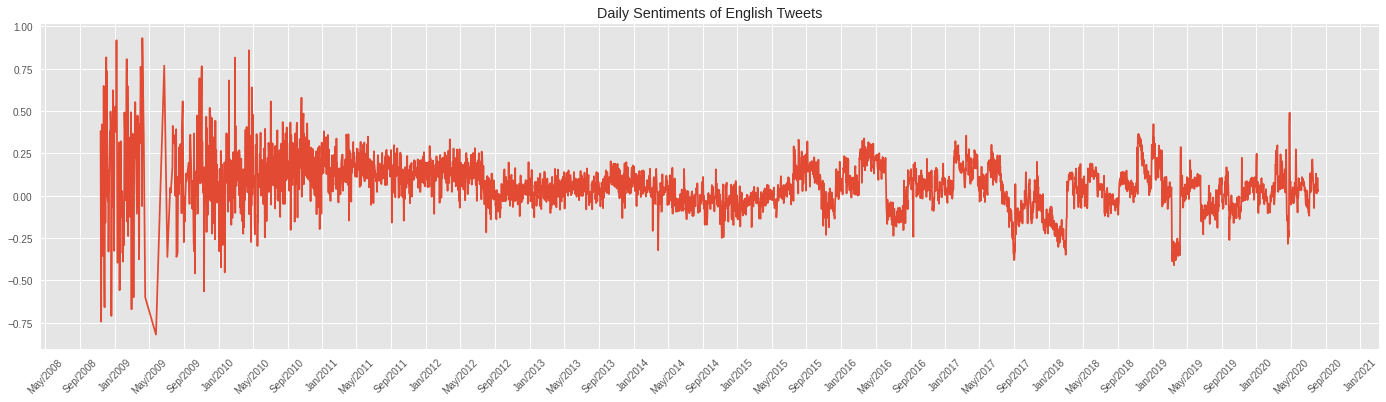

In [ ]:
####this code illustrates the sentiment and save it to spesificed directory/location
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

%matplotlib inline
date = list(tweet_en.date)
compound = list(tweet_en.Compound)

plt.style.use('ggplot')
#9 hazirana kadar data var
fig, ax = plt.subplots(1, 1, figsize=(24, 6))
plt.plot(df.index, df.Compound)
#ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=(0), interval=1))
# Set x-axis major ticks to weekly interval, on Mondays
#MonthLocator: locate months, e.g., 7 for july
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=30))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'));
plt.xticks(rotation=45)
plt.title('Daily Sentiments of English Tweets')
plt.savefig('/content/gdrive/My Drive/css/daily_sentiment.png',dpi=600)#cozunurluk ve dosya adi
plt.show()


In [ ]:
tweet_en.Compound

0         0.7028
1         0.5983
2         0.5423
3        -0.7622
4         0.4005
           ...  
781164    0.0000
781165   -0.1027
781166    0.4767
781167    0.4019
781168    0.0000
Name: Compound, Length: 781169, dtype: float64

In [ ]:
tweets_en_filtered =  []
for i in tweet_filtered['tweet']:
  tweets_en_filtered.append(i)

In [ ]:
type(tweets_en_filtered[0])

str

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

print(analyser.polarity_scores(tweets_en_filtered[87]))   
print(analyser.polarity_scores(tweets_en_filtered[87])['compound'])

{'neg': 0.06, 'neu': 0.87, 'pos': 0.071, 'compound': 0.1027}
0.1027


In [ ]:
sentiment_score = []
for j in tweet_filtered.tweet:
  sentiment_score.append(analyser.polarity_scores(j))
#print(len(sentiment_score))

In [ ]:
compound = []
for i in range(len(sentiment_score)):
  compound.append(sentiment_score[i]['compound'])

In [ ]:
tweet_filtered['Compound'] = DataFrame (compound,columns=['Compound'])
df = tweet_filtered.groupby(tweet_filtered.date).mean()
df.head()
tweet_filtered['date'] = pd.to_datetime(tweet_filtered['date'], errors='coerce')
tweet_filtered['date'] = sorted(tweet_filtered['date'])
tweet_filtered

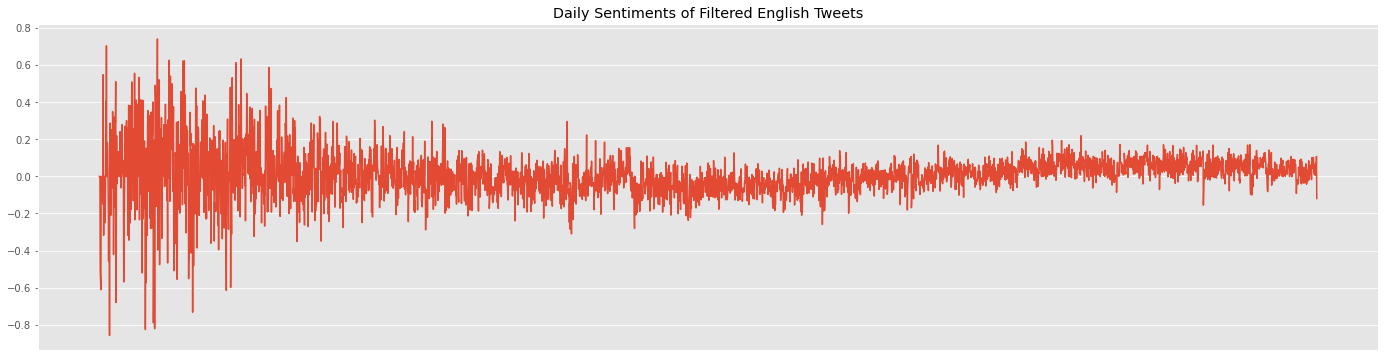

In [ ]:
####this code illustrates the sentiment and save it to spesificed directory/location
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

%matplotlib inline
date = list(tweet_filtered.date)
compound = list(tweet_filtered.Compound)

plt.style.use('ggplot')
#9 hazirana kadar data var
fig, ax = plt.subplots(1, 1, figsize=(24, 6))
plt.plot(df.index, df.Compound)
#ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=(0), interval=1))
# Set x-axis major ticks to weekly interval, on Mondays
#MonthLocator: locate months, e.g., 7 for july
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=30))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'));
plt.xticks(rotation=45)
plt.title('Daily Sentiments of Filtered English Tweets')
plt.savefig('/content/gdrive/My Drive/gmf/english_filtered_daily_sentiment.png',dpi=900)#cozunurluk ve dosya adi
plt.show()


# Turkce Sentiment

In [46]:
import os
os.chdir('/content/gdrive/My Drive/gmf/')

In [ ]:
!pip install --upgrade tensorflow==2.1
!pip3 install ktrain==0.18
!pip3 install transformers==3.0.2

In [42]:
### if this part gives error you should resttart the runtime for libraries to be installed

import ktrain
from ktrain import text
import pandas as pd
import re
import tensorflow

In [ ]:
print(tensorflow.__version__)

2.1.0


In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd


In [ ]:
gdd.download_file_from_google_drive(file_id='18Ev6LWZTcTRnS3cLrQJ3tGKD1cHS9bXr',
                                    dest_path='/content/gdrive/My Drive/gmf',
                                    unzip=True)

In [ ]:
#gdd.download_file_from_google_drive(file_id='19DDNzy1uIk90MkYszOfl7ngJRR1k8M7T',
                                   #dest_path='/content/gdrive/My Drive/gmf',  # SALDIRGAN DİL TESPİTİ
                                    #unzip=True)   

In [ ]:
                              
#gdd.download_file_from_google_drive(file_id='1XN348Ov8V6vjReKV5ZODelM3Kn_IuC-L',
                                    #dest_path='/content/gdrive/My Drive/gmf/', # TEYİDE MUHTAÇLIK TESPİTİ
                                    ##unzip=True)

In [ ]:
#### sentiment analizi paketinin yuklenmesi###

gdd.download_file_from_google_drive(file_id='1ooaswOvJlelulYt9meEhUndQQMgNgK2n',
                                    dest_path='./ft5m_sa.zip',# DUYGU ANALİZİ TESPİTİ
                                    unzip=True) 

In [47]:
import os
os.chdir('/content/gdrive/My Drive/gmf/')
os.getcwd()

'/content/gdrive/My Drive/gmf'

In [ ]:
#model_off = ktrain.load_predictor("ft5m_off")  # NOT, OFF

In [ ]:
#model_cw = ktrain.load_predictor("ft5m_cw")     # 0, 1

In [48]:
model_sa = ktrain.load_predictor("ft5m_sa")#POS, NEG, NOTR

In [49]:
### FINE TUNE MODELLERI KULLANMAK İÇİN ÖN EĞİTİLMİŞ BERT MODELİN HANGİSİ OLDUĞU BELİRTİLMESİ GEREKİYOR
#model_off.preproc.model_name = "berturk-social-5m"
#model_cw.preproc.model_name = "berturk-social-5m"
model_sa.preproc.model_name = "berturk-social-5m"


In [ ]:
sentence = "bu cok kotu bir cumle"

verbose=0 
print(model_sa.predict(sentence))
print(type(model_sa.predict([sentence])))

NEG


<class 'list'>


In [4]:
import pandas as pd
filtered_tweet_tr_en_car = pd.read_csv('/content/gdrive/My Drive/gmf/solutions/tweets/filtered_tweet_tr.csv' , engine='python')

In [ ]:
len(filtered_tweet_tr_en_car)

696363

In [ ]:
filtered_tweet_tr_en_car

,date,username,tweet
493949,2021-03-04,tyrannosurusrex,🇹🇷 @turkihracat'a gore Savunma ve Havacilik Sa...
675790,2021-03-04,arslanbulut9,Arslan Bulut’tan gündem yaratacak yazı. Türkiy...
677498,2021-03-04,eremsenturk,Şimdi bir tartışmaya kulak misafiri oldum: Tam...
641438,2021-03-04,nurozkanerbay,Bugün bir arkadaşın açtığı tazminat davası içi...
641439,2021-03-04,nurozkanerbay,@KriterDergisi Bu ayki sayısında “ABD Boğaziçi...
...,...,...,...
312558,2009-07-05,sibeloktay,"@kbertan tamamdir, dur simdi amerikan telefonu..."
501172,2009-06-22,mirguncabas,"d&r raporu: placebo, manic street preachers, s..."
312559,2009-05-29,sibeloktay,@bakyelli orda bulamadin mi sen yahu? bizim bu...
524262,2009-05-24,vvanwilgenburg,Explosion in Yüksekova (Hakkari province) in T...


In [31]:
filtered_tweet_tr_en_car['date'] =  pd.to_datetime(filtered_tweet_tr_en_car['date'], errors='coerce')

In [ ]:
type(filtered_tweet_tr_en_car['date'])

pandas.core.series.Series

In [ ]:
import re
filtered_tweet_tr_en_car.tweet = filtered_tweet_tr_en_car.tweet.apply(lambda x: re.sub(r"İ", "i",x))
filtered_tweet_tr_en_car.tweet = filtered_tweet_tr_en_car.tweet.str.lower()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
filtered_tweet_tr_en_car.head()

,date,username,tweet
493949,2021-03-04,tyrannosurusrex,🇹🇷 @turkihracat'a gore savunma ve havacilik sa...
675790,2021-03-04,arslanbulut9,arslan bulut’tan gündem yaratacak yazı. türkiy...
677498,2021-03-04,eremsenturk,şimdi bir tartışmaya kulak misafiri oldum: tam...
641438,2021-03-04,nurozkanerbay,bugün bir arkadaşın açtığı tazminat davası içi...
641439,2021-03-04,nurozkanerbay,@kriterdergisi bu ayki sayısında “abd boğaziçi...


In [ ]:
deneme = filtered_tweet_tr_en_car.tweet[:]
deneme

493949    🇹🇷 @turkihracat'a gore savunma ve havacilik sa...
675790    arslan bulut’tan gündem yaratacak yazı. türkiy...
677498    şimdi bir tartışmaya kulak misafiri oldum: tam...
641438    bugün bir arkadaşın açtığı tazminat davası içi...
641439    @kriterdergisi bu ayki sayısında “abd boğaziçi...
                                ...                        
312558    @kbertan tamamdir, dur simdi amerikan telefonu...
501172    d&r raporu: placebo, manic street preachers, s...
312559    @bakyelli orda bulamadin mi sen yahu? bizim bu...
524262    explosion in yüksekova (hakkari province) in t...
524263    pkkmed ltte leader velupillai prabhakaran is n...
Name: tweet, Length: 696362, dtype: object

In [ ]:
deneme = filtered_tweet_tr_en_car.tweet[:]
deneme
filtered_tweet_tr_en_car.tweet = filtered_tweet_tr_en_car.tweet.astype(str)
deneme = list(filtered_tweet_tr_en_car.tweet)

In [ ]:
deneme

["🇹🇷 @turkihracat'a gore savunma ve havacilik sanayii;  •şubat 2021 ihracati, 2020'ye gore %34,1 artışla $233.225.000 oldu.  •2021 toplam ihracati, 2020'ye gore %17,5 artışla $400.222.000 oldu.  gorunum: pozitif  şubat'ta ihracatın, ocak'a göre, ivmelenerek arttığı görülmekte.  https://t.co/gf4pc4q06j",
 'arslan bulut’tan gündem yaratacak yazı. türkiye’de 18 yıldır ihlal edilen insan haklarını kimse böyle anlatmadı  https://t.co/qto1ttdf0p',
 'şimdi bir tartışmaya kulak misafiri oldum: tam isabet çözümleme.   maskesini çenesine indirmiş bir vatandaşı başka bir vatandaş  “maskenizi takar mısınız” diye uyardı.  maskesi çenesinde olan kişi hemen hamle yaptı “doğru” diyerek maskeyi taktı.  uyaran kişi başladı konuşmaya',
 'bugün bir arkadaşın açtığı tazminat davası için mahkemede şahitlik ettim.ağustos’ta emekliye ayrılacak olan,ilk duruşmada yurtdışı görevli-mazeretli olmama rağmen “zorla getirme”kararı çıkartan hakime hanım bugün”tanığa gerek yokmuş ki” deyiverdi:)ha bu arada davayı yine

In [55]:
len(deneme) == len(rest) 

True

In [56]:
###with the new data you should wait the result of this code a bit###
#deneme = filtered_tweet_tr_en_car.tweet[:]
#pd.DataFrame(model_sa.predict(deneme)).to_csv('rest_sentiment.csv')
sent_list = model_sa.predict(deneme)

In [57]:
len(sent_list) == len(rest)

True

In [ ]:
sentiment = []
for i in sent_list:
  if i == 'NEG':
    sentiment.append(-1)
  elif i == 'POS':
    sentiment.append(1)
  elif i == 'NOTR': 
    sentiment.append(-1)
filtered_tweet_tr_en_car = filtered_tweet_tr_en_car.assign(sentiment = sentiment)


In [ ]:
filtered_tweet_tr_en_car.to_csv('/content/gdrive/MyDrive/gmf/solutions/tweets/filtered_tweet_tr_with_sentiment.csv')

# Farkli meslek gruplarinin sentiment analizleri

In [ ]:
def visualize(df1,df2):
  import matplotlib.dates as mdates
  import matplotlib.pyplot as plt

  %matplotlib inline


  plt.style.use('ggplot')
  #9 hazirana kadar data var
  fig, ax = plt.subplots(1, 1, figsize=(24, 6))
  plt.plot(df1.index, df1.sentiment, label = 'gazeteci')
  plt.plot(df2.index, df2.sentiment , label = 'akademik')
  plt.legend(loc="upper right")
#ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=(0), interval=1))
# Set x-axis major ticks to weekly interval, on Mondays
#MonthLocator: locate months, e.g., 7 for july
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=30))
  ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
# Format x-tick labels as 3-letter month name and day number
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'));
  plt.xticks(rotation=45)
#plt.title('Daily Sentiments of Turkish Tweets')
  plt.savefig('tr_sentiment.png',dpi=600)
  plt.show()


In [ ]:
account_info = pd.read_csv('accounts_info.csv')
account_info.head()

In [ ]:
account_info.Meslek.unique()

array(['Birden Fazla', 'Akademisyen/Araştırmacı', 'Gazeteci', 'Diğer',
       'Siyasetçi', 'Freelance', 'Bürokrat/Diplomat', nan], dtype=object)

Farkli meslek gruplarinin tweetlerinin ayri bir yerde toplanmasi

In [ ]:
gazeteci= account_info[account_info['Meslek']=='Gazeteci']['Twitter Handle']
gazeteci = gazeteci.reset_index(drop=True)
gazeteci_list = list(gazeteci)
print(gazeteci_list[0])
gazeteci_tweet = tr_tweet[tr_tweet['username'].isin(gazeteci_list)]
gazeteci_tweet

In [ ]:
academics= account_info[account_info['Meslek']=='Akademisyen/Araştırmacı']['Twitter Handle']
academics = academics.reset_index(drop=True)
academics_list = list(academics)
print(academics_list[0])
academics_tweet = tr_tweet[tr_tweet['username'].isin(academics_list)]
academics_tweet

In [ ]:
diplomat= account_info[account_info['Meslek']=='Bürokrat/Diplomat']['Twitter Handle']
diplomat = diplomat.reset_index(drop=True)
diplomat_list = list(diplomat)
print(diplomat_list[0])
diplomat_tweet = tr_tweet[tr_tweet['username'].isin(diplomat_list)]
diplomat_tweet


In [ ]:
def profession_tweet(profession):#options are : 'Akademisyen/Araştırmacı', 'Gazeteci', 'Siyasetçi', 'Freelance', 'Bürokrat/Diplomat', 'Diğer',
       'Siyasetçi', 'Freelance', 'Bürokrat/Diplomat'
  df_ = account_info[account_info['Meslek']==profession]['Twitter Handle']
  df_ =df_.reset_index(drop=True)
  df_list = list(df_)
  print(df_list[0])
  df_tweet = tr_tweet[tr_tweet['username'].isin(df_list)]
  df_tweet.head()
  return df_tweet.groupby(df_tweet.date).mean()

In [ ]:
del df2
df2 = academics_tweet.groupby(academics_tweet.date).mean()


In [ ]:
del df1
df1 = gazeteci_tweet.groupby(gazeteci_tweet.date).mean()

In [ ]:
del df3
df3 = diplomat_tweet.groupby(diplomat_tweet.date).mean()

if you instert he profession to the code below, it will give you the tweets of the spesific profession. Then you can use that dataframe(df) to visualize below

In [ ]:
df4 = profession_tweet('instert one of the profession above')

you can create different data frames of different professIons

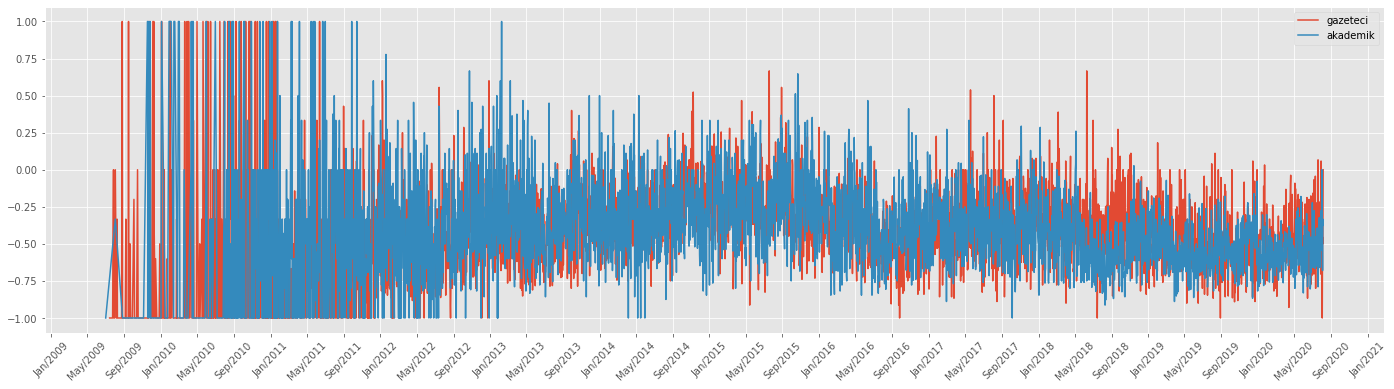

In [ ]:
visualize(df1,df2)#while inserting some other df's you can obtain graphs for different professsio

# Miscalleneous

In [ ]:
df_all.to_csv('filtered_tr_new_with_sentiment.csv' , index=False)
rest = filtered_tweet_tr_en_car[filtered_tweet_tr_en_car['date'] > '2020-05-13']

In [1]:
rest = filtered_tweet_tr_en_car[filtered_tweet_tr_en_car['date'] > '2020-08-06']

NameError: ignored

In [2]:
df = df_old[['date','username', 'tweet', 'sentiment']]
df

NameError: ignored

In [ ]:
df_all = pd.concat([df_old,rest])
df_all

In [ ]:
sentiment = pd.read_csv('/content/gdrive/MyDrive/gmf/rest_sentiment.csv')
sentiment
  

In [ ]:
"""
df = df[0]
sentiment = []
for i in df:
  if i == 'NEG':
    sentiment.append(-1)
  elif i == 'POS':
    sentiment.append(1)
  elif i == 'NOTR': 
    sentiment.append(-1)
"""

In [ ]:
filtered_tweet_tr_en_car =filtered_tweet_tr_en_car.assign(sentiment = sentiment)

In [ ]:
filtered_tweet_tr_en_car.head()

In [ ]:
import os
os.chdir('/content/gdrive/My Drive/gmf/')
os.getcwd()

In [ ]:
##dataset which includes sentiment scores###
tr_tweet = pd.read_csv('/content/gdrive/My Drive/gmf/tr_filtered_with_sentiment.csv' , engine='python')

In [ ]:
tr_tweet.head()

In [ ]:

df = tr_tweet.groupby(tr_tweet.date).mean()
df

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

%matplotlib inline


plt.style.use('ggplot')
#9 hazirana kadar data var
fig, ax = plt.subplots(1, 1, figsize=(24, 6))
plt.plot(df.index, df.sentiment)

#ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=(0), interval=1))
# Set x-axis major ticks to weekly interval, on Mondays
#MonthLocator: locate months, e.g., 7 for july
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=30))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'));
plt.xticks(rotation=45)
plt.title('Daily Sentiments of Filtered Turkish Tweets')#baslik ayarlama title
plt.savefig('/content/gdrive/My Drive/gmf/sentiment_graphs/tr_filtered_sentiment.png',dpi=600)
plt.show()


In [ ]:
import os
os.chdir('/content/gdrive/My Drive/gmf/')
### if this part gives error you should resttart the runtime for libraries to be installed

import ktrain
from ktrain import text
import pandas as pd
import re
import tensorflow
model_sa = ktrain.load_predictor("ft5m_sa")#POS, NEG, NOTR
model_sa.preproc.model_name = "berturk-social-5m"
sentence = "bu cok kotu bir cumle"

verbose=0 
print(model_sa.predict(sentence))
print(type(model_sa.predict([sentence])))

In [ ]:
import pandas as pd
tweet_tr_no_filter = pd.read_csv('/content/gdrive/My Drive/gmf/tweet_tr' , engine='python')
tweet_tr_no_filter.tweet = tweet_tr_no_filter.tweet.str.replace("İ", "i", regex=True)
tweet_tr_no_filter.tweet = tweet_tr_no_filter.tweet.str.lower() 

In [ ]:
#tweet_tr_no_filter.tweet  = str(tweet_tr_no_filter.tweet)
#tweet_tr_no_filter.tweet = tweet_tr_no_filter.tweet[:].apply(lambda x: re.sub(r"İ", "i",x))
#tweet_tr_no_filter.tweet  = tweet_tr_no_filter.tweet.str.lower()
#tweet_tr_no_filter.tweet = tweet_tr_no_filter.tweet.str.replace("İ", "i", regex=True)

In [ ]:
tweet_tr_no_filter.tweet = tweet_tr_no_filter.tweet.astype(str)
deneme = list(tweet_tr_no_filter.tweet)
#part1 = deneme[0:100000]
#part2 = deneme[100001:250000]
#part3 = deneme[800001:1250000]
#part4 = deneme[1250000:]

In [ ]:
len

In [ ]:
import os
os.chdir('/content/gdrive/My Drive/gmf/')
import pandas as pd
data = pd.read_csv('tr_final_All_sentiment.csv', header= None)
data

In [ ]:
for i in data[0].head():
  print(i)

In [ ]:
sent_tr_all = []
for i in data[0]:
  if i == 'POS':
    sent_tr_all.append(1)
  elif i == 'NEG':
    sent_tr_all.append(-1)
  else:
    sent_tr_all.append(0)
sent_tr_all[0:5]
  

In [ ]:
len(sent_tr_all)

In [ ]:
tweet_tr_no_filter = tweet_tr_no_filter.assign( sentiment = sent_tr_all )

In [ ]:
tweet_tr_no_filter

In [ ]:
tweet_tr_no_filter.to_csv('/content/gdrive/My Drive/gmf/tweet_tr_with_sentiment')

In [ ]:
i = 0
k= 0
for k in range(len(data),1620936, 100000): 
  i = i+1
  print(i)
  temp = deneme[k:k+100000]
  duygu = model_sa.predict(temp)
  df = pd.DataFrame(duygu)
  df.to_csv('tr_final_All_sentiment.csv', mode='a', header=False , index= False)
  print(k+100000)

In [ ]:
temp = deneme[1700000:]
duygu = model_sa.predict(temp)
df = pd.DataFrame(duygu)
df.to_csv('tr_final_All_sentiment.csv', mode='a', header=False , index= False)

In [ ]:
tweet_tr_no_filter['date'] = pd.to_datetime(tweet_tr_no_filter['date'], errors='coerce')

df = tweet_tr_no_filter.groupby(tweet_tr_no_filter.date).mean()
df

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

%matplotlib inline


plt.style.use('ggplot')
#9 hazirana kadar data var
fig, ax = plt.subplots(1, 1, figsize=(24, 6))
plt.plot(df.index, df.sentiment)

#ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=(0), interval=1))
# Set x-axis major ticks to weekly interval, on Mondays
#MonthLocator: locate months, e.g., 7 for july
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=30))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'));
plt.xticks(rotation=45)
plt.title('Daily Sentiments of All Turkish Tweets')#baslik ayarlama title
plt.savefig('tr_no_filter_sentiment.png',dpi=600)
plt.show()
